In [1]:
library(ggplot2)
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(tseries)

── Attaching packages ──────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
data <- read.csv("data/sum-months.csv")
data["delay_rate"] <- data$arr_del15 / data$arr_flights
data["new_delay_rate"] <- (data$arr_del15 - data$late_aircraft_ct)/(data$arr_flights - data$late_aircraft_ct)
data["new_arr_flights"] <- (data$arr_flights - data$late_aircraft_ct)
data["jan"] <- as.numeric(data$month==1)
data["feb"] <- as.numeric(data$month==2)
data["mar"] <- as.numeric(data$month==3)
data["apr"] <- as.numeric(data$month==4)
data["may"] <- as.numeric(data$month==5)
data["jun"] <- as.numeric(data$month==6)
data["jul"] <- as.numeric(data$month==7)
data["aug"] <- as.numeric(data$month==8)
data["sep"] <- as.numeric(data$month==9)
data["oct"] <- as.numeric(data$month==10)
data["nov"] <- as.numeric(data$month==11)
data["dec"] <- as.numeric(data$month==12)
data["arr_flights_n"] = data$arr_flights / max(data$arr_flights)
filter = data$year>2003 & data$year<2020
data = data[filter,]

In [27]:
# nope, nothing to see here

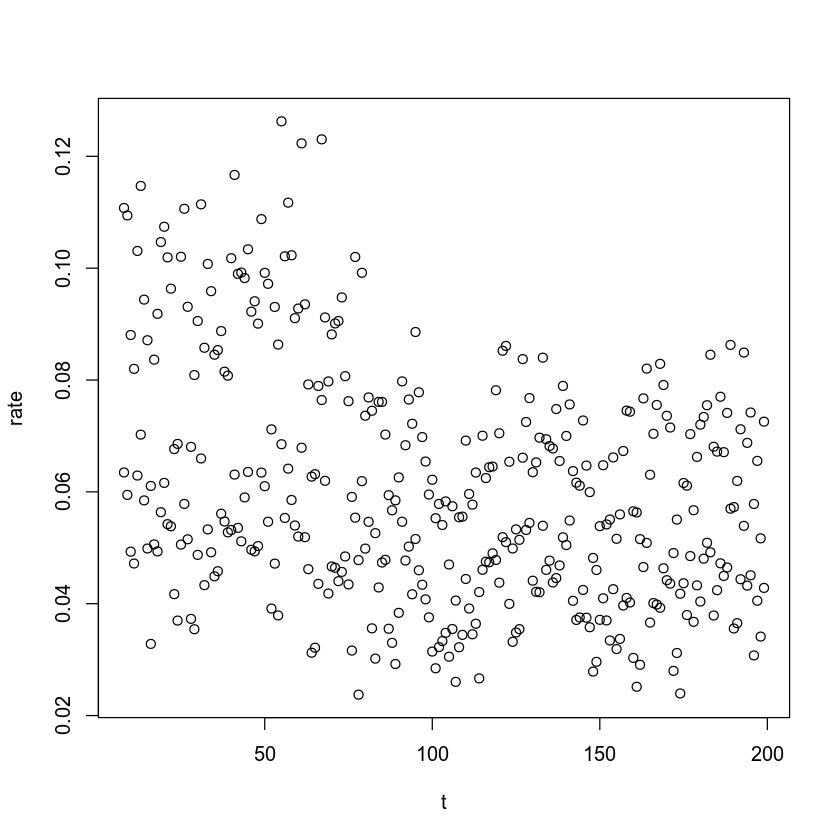

In [28]:
plot(rate~t,data=data)

[1] "BIC="              "-1473.03147810671"
[1] "AIC="              "-1552.04432915847"



Call: rlm(formula = delay_rate ~ feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec + mon_ct + tue_ct + wed_ct + 
    thu_ct + fri_ct + sat_ct + sun_ct, data = data)
Residuals:
      Min        1Q    Median        3Q       Max 
-0.089165 -0.020055 -0.001296  0.019834  0.102562 

Coefficients:
            Value   Std. Error t value
(Intercept)  1.1348  0.3896     2.9124
feb         -0.0874  0.0355    -2.4587
mar         -0.0101  0.0076    -1.3252
apr         -0.0521  0.0148    -3.5194
may         -0.0130  0.0076    -1.7104
jun          0.0028  0.0148     0.1889
jul          0.0249  0.0076     3.2630
aug          0.0014  0.0077     0.1782
sep         -0.0844  0.0148    -5.7178
oct         -0.0395  0.0076    -5.1678
nov         -0.0730  0.0148    -4.9422
dec          0.0334  0.0076     4.3795
mon_ct      -0.0292  0.0131    -2.2314
tue_ct      -0.0304  0.0137    -2.2147
wed_ct      -0.0293  0.0129    -2.2740
thu_ct      -0.0313  0.0136    -2.2907
fri_ct      -0.0301  0.0

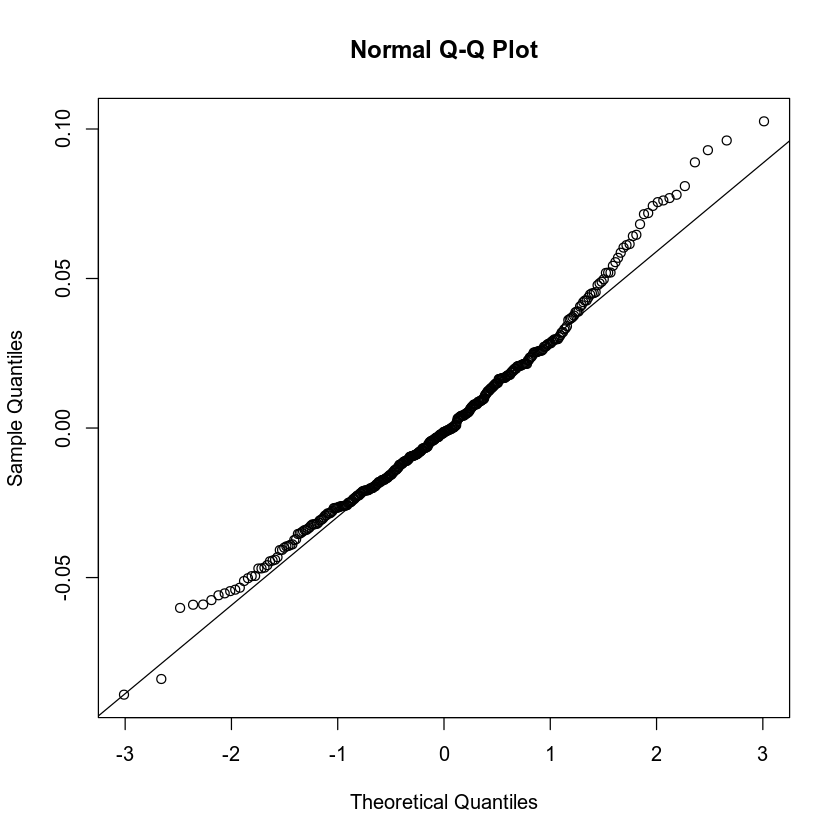

In [28]:
m <- MASS::rlm(delay_rate~ feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec +mon_ct+tue_ct+wed_ct+thu_ct+fri_ct+sat_ct+sun_ct,data=data)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
summary(m)
qqnorm(m$residuals); qqline(m$residuals)



[1] "BIC="              "-44.4569514181587"
[1] "AIC="              "-123.469802469913"



Call: rlm(formula = t_delay_rate ~ feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec + mon_ct + tue_ct + wed_ct + 
    thu_ct + fri_ct + sat_ct + sun_ct, data = data)
Residuals:
      Min        1Q    Median        3Q       Max 
-0.582631 -0.127124 -0.002481  0.121152  0.615238 

Coefficients:
            Value   Std. Error t value
(Intercept)  5.0679  2.5718     1.9706
feb         -0.6046  0.2346    -2.5768
mar         -0.0644  0.0502    -1.2823
apr         -0.3497  0.0976    -3.5817
may         -0.0817  0.0502    -1.6265
jun         -0.0120  0.0975    -0.1228
jul          0.1535  0.0503     3.0502
aug          0.0112  0.0505     0.2227
sep         -0.5932  0.0974    -6.0924
oct         -0.2684  0.0504    -5.3262
nov         -0.5006  0.0975    -5.1362
dec          0.1959  0.0503     3.8932
mon_ct      -0.2029  0.0865    -2.3459
tue_ct      -0.2101  0.0905    -2.3216
wed_ct      -0.2046  0.0850    -2.4062
thu_ct      -0.2114  0.0901    -2.3472
fri_ct      -0.2122  0

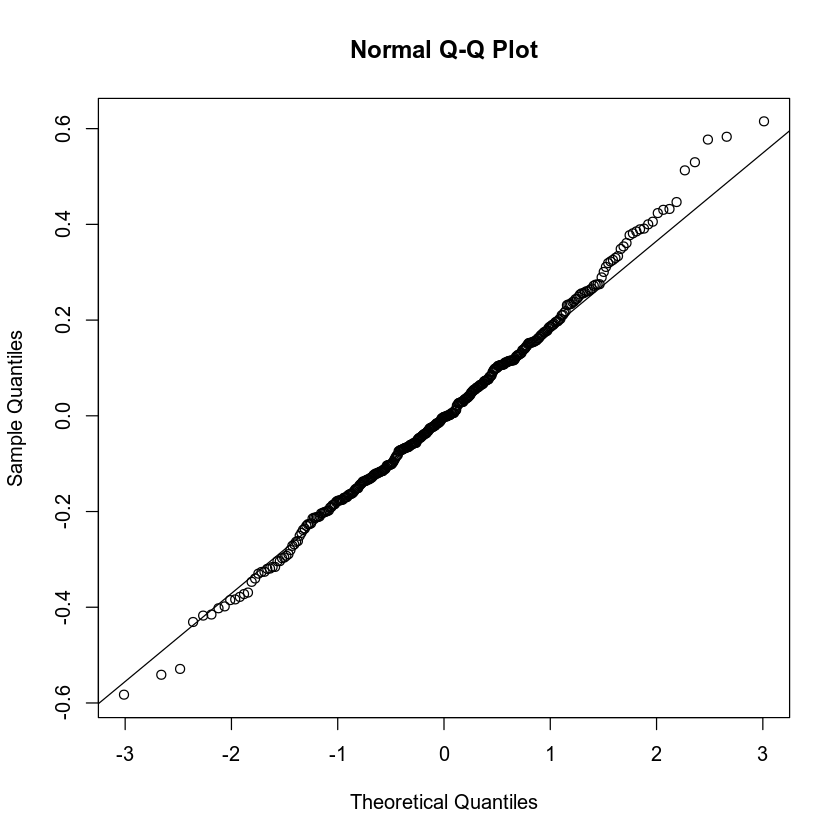

In [29]:
m <- MASS::rlm(t_delay_rate~ feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec +mon_ct+tue_ct+wed_ct+thu_ct+fri_ct+sat_ct+sun_ct,data=data)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
summary(m)
qqnorm(m$residuals); qqline(m$residuals)


[1] "BIC="              "-44.4569514181587"
[1] "AIC="              "-123.469802469913"



Call: rlm(formula = t_delay_rate ~ feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec + extra_mon + extra_tue + extra_wed + 
    extra_thu + extra_fri + extra_sat + extra_sun, data = data)
Residuals:
      Min        1Q    Median        3Q       Max 
-0.582631 -0.127124 -0.002481  0.121152  0.615238 

Coefficients:
            Value   Std. Error t value
(Intercept) -0.7583  0.2519    -3.0106
feb         -0.6046  0.2346    -2.5768
mar         -0.0644  0.0502    -1.2823
apr         -0.3497  0.0976    -3.5817
may         -0.0817  0.0502    -1.6265
jun         -0.0120  0.0975    -0.1228
jul          0.1535  0.0503     3.0502
aug          0.0112  0.0505     0.2227
sep         -0.5932  0.0974    -6.0924
oct         -0.2684  0.0504    -5.3262
nov         -0.5006  0.0975    -5.1362
dec          0.1959  0.0503     3.8932
extra_mon   -0.2029  0.0865    -2.3459
extra_tue   -0.2101  0.0905    -2.3216
extra_wed   -0.2046  0.0850    -2.4062
extra_thu   -0.2114  0.0901    -2.3472
e

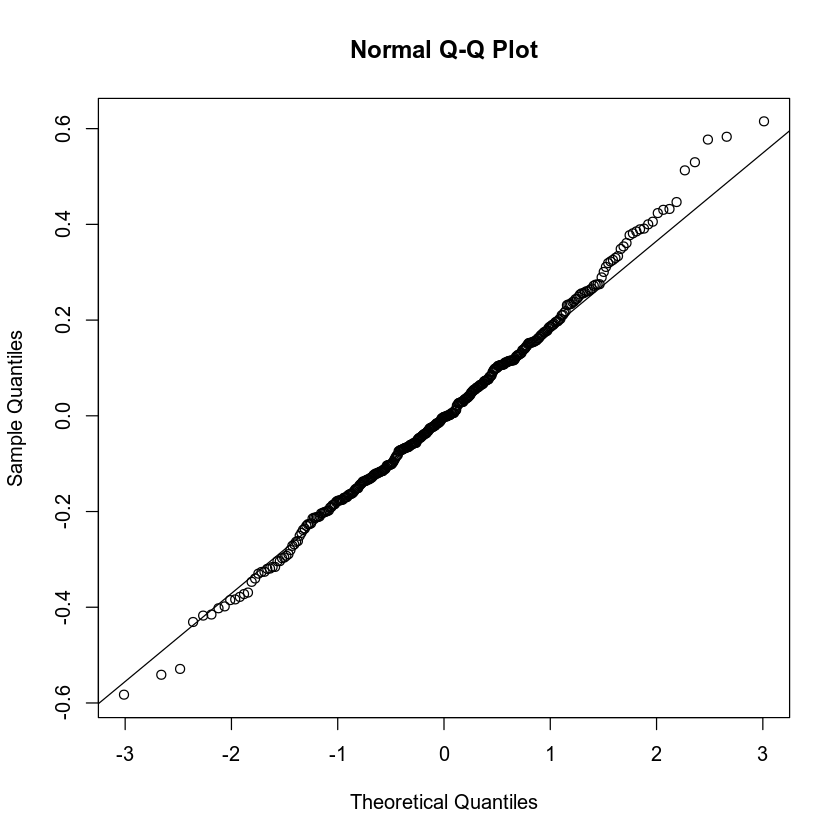

In [35]:
m <- MASS::rlm(t_delay_rate~ feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec +extra_mon+extra_tue+extra_wed+extra_thu+extra_fri+extra_sat+extra_sun,data=data)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

write.csv(coef(summary(m)),file="data/time_model.csv")
timemodel<-m


[1] "BIC="             "121.743648927792"
[1] "AIC="             "86.1878659545029"



Call: rlm(formula = t_delay_rate ~ extra_mon + extra_tue + extra_wed + 
    extra_thu + extra_fri + extra_sat + extra_sun, data = data)
Residuals:
     Min       1Q   Median       3Q      Max 
-0.74390 -0.17931  0.02059  0.16988  0.67798 

Coefficients:
            Value    Std. Error t value 
(Intercept)  -1.5185   0.0465   -32.6262
extra_mon     0.0411   0.0446     0.9208
extra_tue     0.0222   0.0442     0.5019
extra_wed     0.0501   0.0453     1.1057
extra_thu     0.0300   0.0436     0.6875
extra_fri     0.0261   0.0454     0.5758
extra_sat     0.0460   0.0438     1.0509
extra_sun     0.0194   0.0445     0.4362

Residual standard error: 0.2629 on 376 degrees of freedom

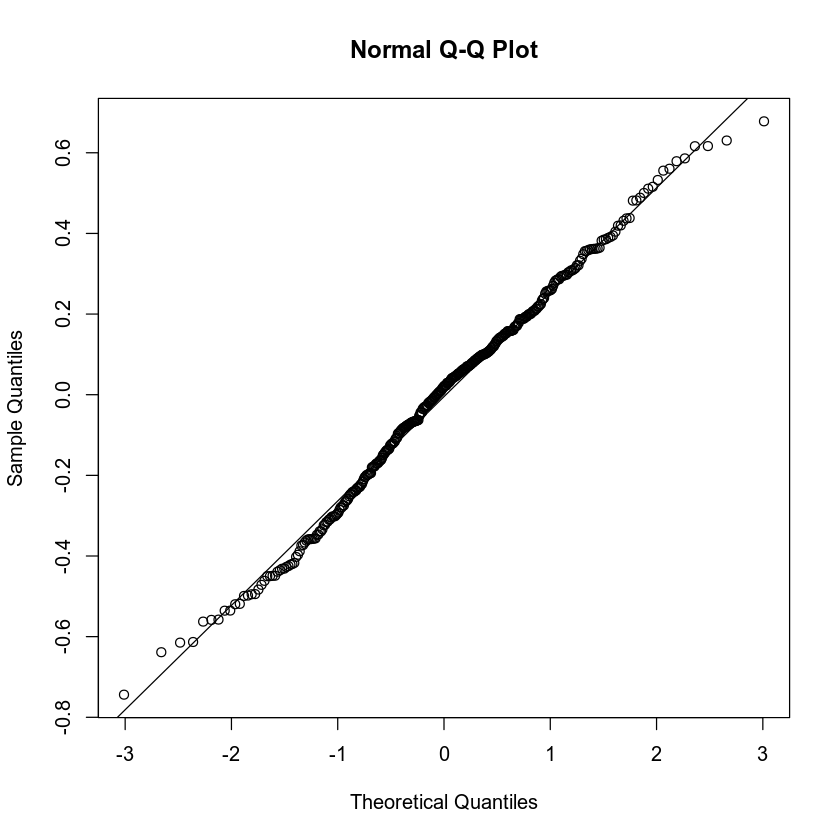

In [31]:
m <- MASS::rlm(t_delay_rate~extra_mon+extra_tue+extra_wed+extra_thu+extra_fri+extra_sat+extra_sun,data=data)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

[1] "BIC="              "-83.1640303254912"
[1] "AIC="              "-134.522383509132"



Call: rlm(formula = t_delay_rate ~ feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec, data = data)
Residuals:
      Min        1Q    Median        3Q       Max 
-0.585234 -0.123946 -0.004253  0.121876  0.575943 

Coefficients:
            Value    Std. Error t value 
(Intercept)  -1.3825   0.0349   -39.6316
feb          -0.0042   0.0493    -0.0845
mar          -0.0653   0.0493    -1.3227
apr          -0.1409   0.0493    -2.8552
may          -0.0817   0.0493    -1.6566
jun           0.1961   0.0493     3.9758
jul           0.1532   0.0493     3.1050
aug           0.0116   0.0493     0.2348
sep          -0.3857   0.0493    -7.8177
oct          -0.2673   0.0493    -5.4177
nov          -0.2928   0.0493    -5.9349
dec           0.1951   0.0493     3.9545

Residual standard error: 0.1829 on 372 degrees of freedom

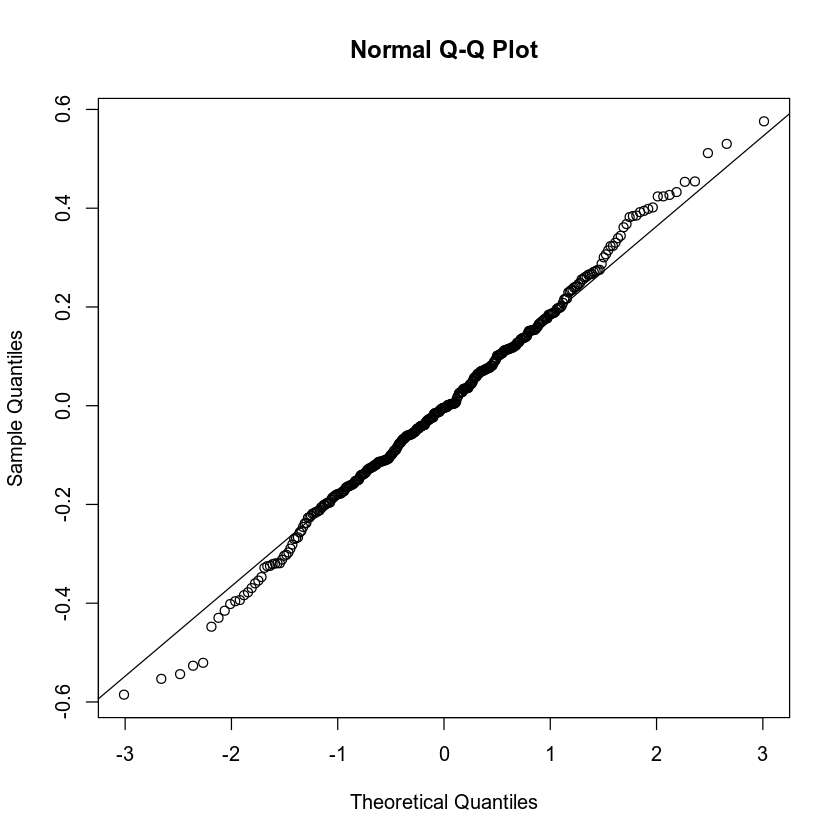

In [33]:
m <- MASS::rlm(t_delay_rate~ feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec ,data=data)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

In [26]:
sum(data$mar)

[1] 32

In [37]:
shapiro.test(timemodel$residuals)


	Shapiro-Wilk normality test

data:  timemodel$residuals
W = 0.9958, p-value = 0.3985


In [38]:
m0 <- lm(t_delay_rate~ feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec +extra_mon+extra_tue+extra_wed+extra_thu+extra_fri+extra_sat+extra_sun,data=data)
summary(m0)


Call:
lm(formula = t_delay_rate ~ feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec + extra_mon + extra_tue + extra_wed + 
    extra_thu + extra_fri + extra_sat + extra_sun, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57817 -0.12821 -0.00871  0.12137  0.55569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.94119    0.25111  -3.748 0.000207 ***
feb         -0.42226    0.23392  -1.805 0.071876 .  
mar         -0.04973    0.05008  -0.993 0.321424    
apr         -0.29644    0.09733  -3.046 0.002490 ** 
may         -0.07949    0.05007  -1.587 0.113281    
jun          0.04911    0.09720   0.505 0.613697    
jul          0.15906    0.05018   3.170 0.001653 ** 
aug          0.02047    0.05034   0.407 0.684508    
sep         -0.51423    0.09708  -5.297 2.04e-07 ***
oct         -0.24527    0.05024  -4.882 1.58e-06 ***
nov         -0.45102    0.09717  -4.641 4.83e-06 ***
dec          0.19726    0.05016   3.93

In [39]:
jarque.bera.test(timemodel$residuals)


	Jarque Bera Test

data:  timemodel$residuals
X-squared = 3.0323, df = 2, p-value = 0.2196
